## Analisis exploratorio de datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_yelp = pd.read_parquet("D:\Desktop\\proyecto_grupal\\Dataset parquet\\df_yelp.parquet")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10196\3806738085.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_yelp = pd.read_parquet("D:\Desktop\\proyecto_grupal\\Dataset parquet\\df_yelp.parquet")


In [5]:
# Dimensiones del dataset
print("Dimensiones:", df_yelp.shape)

Dimensiones: (5177, 22)


In [6]:
# Conteo de valores nulos por columna
print("Valores nulos por columna:\n", df_yelp.isnull().sum())


Valores nulos por columna:
 business_id       0
name              0
address           5
city              0
state             0
postal_code       1
latitude          0
longitude         0
stars_x           0
review_count      0
is_open           0
attributes        2
categories        0
hours           161
text              0
cool              0
stars_y           0
date              0
funny             0
review_id         0
useful            0
user_id           0
dtype: int64


### Revisar duplicados en las columnas más importantes

In [7]:
df_yelp.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,text,cool,stars_y,date,funny,review_id,useful,user_id
0,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Good was on par with your typical sports bar. ...,0,3,2015-01-11 22:49:33 UTC,0,CSebyfJjT740KKgE6IPYcg,0,ZYNEE_VRshepHB599zUWcA
1,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...","With chain restaurants, I write short reviews ...",0,4,2019-07-08 00:18:19 UTC,3,B5aECxALkQZgQQQ4oQiVSA,0,_TKXaTPT2Yu0rRFqYzs44g
2,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Been wanting to come to twin peaks for a while...,0,5,2022-01-18 20:36:24 UTC,0,uOzC-IXnlc5hJ2h-0jNRKQ,0,ZphdnOBaO5Qd3STxXjspVw
3,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56,...,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",This place is pretty well-run - it's always cl...,0,4,2009-01-25 04:08:52 UTC,0,PUNdXZqu6PvqhOWnsqIkAw,1,OZTZgCcxO7fcFkZ3LYDroA
4,uDQgmudYDKiB6n4vwbEeDg,Chrysalis,9040 Carothers Pkwy,Franklin,FL,37067,35.956533,-86.802720,4.5,112,...,"Restaurants, Italian, Nightlife, Bars, Cocktai...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...","We ordered take-out from this new place, and s...",1,4,2021-02-15 19:44:15 UTC,1,QhOnn7yj_oheUXjzAsT6ug,4,Z18Bze20mEVqRXAfe8DjZg


In [48]:
# 1. Verificar duplicados en 'name' y 'address' combinados (para ver si hay negocios con el mismo nombre y dirección)
duplicates_name_address = df_yelp.duplicated(subset=['name', 'address',"city","postal_code"]).sum()
print(f"Duplicados en 'name','address','city', 'postal_code': {duplicates_name_address}")

# 2. Verificar duplicados en 'review_id'
duplicates_review_id = df_yelp.duplicated(subset='review_id').sum()
print(f"Duplicados en 'review_id': {duplicates_review_id}")

Duplicados en 'name','address','city', 'postal_code': 2531
Duplicados en 'review_id': 0


In [8]:
df_yelp[df_yelp.duplicated(subset=['name', 'address',"city","postal_code"], keep=False)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,text,cool,stars_y,date,funny,review_id,useful,user_id
0,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Good was on par with your typical sports bar. ...,0,3,2015-01-11 22:49:33 UTC,0,CSebyfJjT740KKgE6IPYcg,0,ZYNEE_VRshepHB599zUWcA
1,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...","With chain restaurants, I write short reviews ...",0,4,2019-07-08 00:18:19 UTC,3,B5aECxALkQZgQQQ4oQiVSA,0,_TKXaTPT2Yu0rRFqYzs44g
2,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Been wanting to come to twin peaks for a while...,0,5,2022-01-18 20:36:24 UTC,0,uOzC-IXnlc5hJ2h-0jNRKQ,0,ZphdnOBaO5Qd3STxXjspVw
5,Edg22x3CZkIv0GUib2oEFA,Mellow Mushroom,8227 Oak St,New Orleans,FL,70118,29.948624,-90.131250,3.5,149,...,"Pizza, Restaurants, Bars, Nightlife, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",Fun ambiance and food is good not great. Servi...,0,3,2019-09-14 22:43:20 UTC,0,YMpRLhAt7r2FYVp0JSpfdw,0,9lAp1eOFlvmA21pvLn6UsQ
6,Edg22x3CZkIv0GUib2oEFA,Mellow Mushroom,8227 Oak St,New Orleans,FL,70118,29.948624,-90.131250,3.5,149,...,"Pizza, Restaurants, Bars, Nightlife, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",The good. We had the pizza. Delicious crust. C...,0,3,2016-03-25 03:10:54 UTC,0,mNgCyN6iuDHrJFqLwEBqXQ,0,NEgCqpLI1QCN5TxKn23fiA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...","I've been here quite a few times, and I keep c...",1,3,2017-02-26 06:15:50 UTC,2,wCrGEMdMCfkfF1JTufCkyg,2,sfWQ65a8iAfeV0oC02WOcw
5172,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",This is a new place so they are still figuring...,0,4,2016-12-04 02:44:04 UTC,0,7iLCPEdCZG5S4vHoxW0j9A,0,MRfqD6CThb8kD7D7XG1oeQ
5173,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",First time having ramen as a celiac! The meat ...,0,4,2019-07-12 02:56:30 UTC,0,wKg4LVG-mPafJ8rgFhsnPA,0,nQvLgonk2ILzEDRMEdNsRQ
5174,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",I love this spot for yummy ramen. I don't real...,2,4,2021-06-20 17:13:08 UTC,0,hMSIDi4mxvVWglvox6ADvg,1,PFyt8ujcHS0Upp2rGL-TCQ


In [50]:
# Mostrar filas duplicadas (si existen) en cada caso para su revisión

if duplicates_name_address > 0:
    print("\nDuplicados en 'name' y 'address':")
    print(df_yelp[df_yelp.duplicated(subset=['name', 'address',"city","postal_code"], keep=False)])
    
if duplicates_review_id > 0:
    print("\nDuplicados en 'review_id':")
    print(df_yelp[df_yelp.duplicated(subset='review_id', keep=False)])


Duplicados en 'name' y 'address':
                 business_id             name          address          city  \
0     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
1     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
2     seKihQKpGGnCeLuELRQPSQ       Twin Peaks   6880 E 82nd St  Indianapolis   
5     Edg22x3CZkIv0GUib2oEFA  Mellow Mushroom      8227 Oak St   New Orleans   
6     Edg22x3CZkIv0GUib2oEFA  Mellow Mushroom      8227 Oak St   New Orleans   
...                      ...              ...              ...           ...   
5171  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5172  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5173  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5174  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   
5175  2xxkaRy7rP5EUyjFt2J5kA      Nikka Ramen  5701 Calle Real        Goleta   

    

### Histograma de las variables numéricas

In [9]:
# Seleccionar columnas numéricas relevantes
numeric_columns = [ 'review_count', 'latitude', 'longitude']

Text(0.5, 1.02, 'Distribución de Variables Numéricas')

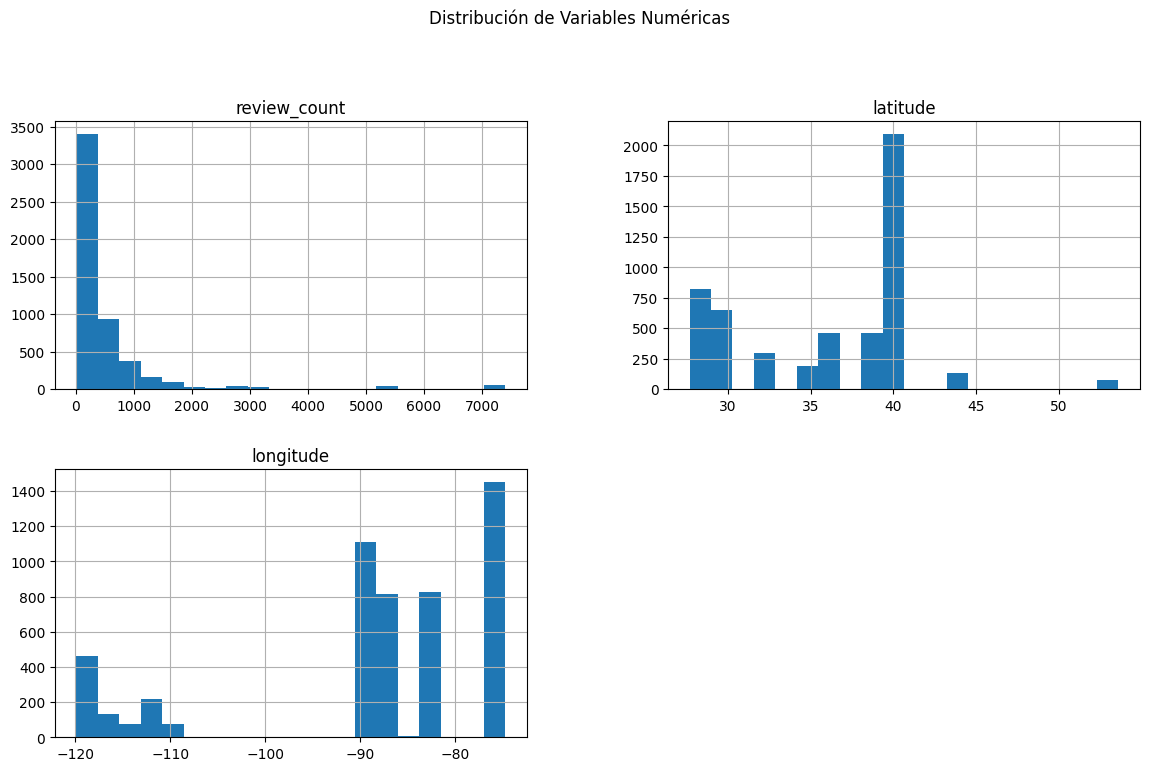

In [10]:

df_yelp[numeric_columns].hist(bins=20, figsize=(14, 8))
plt.suptitle("Distribución de Variables Numéricas", y=1.02)

### outliers

In [11]:
df_yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'text', 'cool', 'stars_y', 'date',
       'funny', 'review_id', 'useful', 'user_id'],
      dtype='object')

In [12]:
# Cálculo del IQR para identificar outliers en review_count
Q1_reviews = df_yelp['review_count'].quantile(0.25)
Q3_reviews = df_yelp['review_count'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Límite inferior y superior para los outliers en review_count
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

# Filtrar outliers en review_count
outliers_reviews = df_yelp[(df_yelp['review_count'] < lower_bound_reviews) | (df_yelp['review_count'] > upper_bound_reviews)]

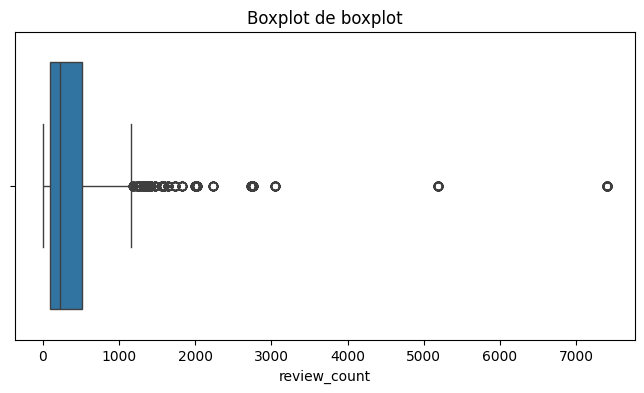

In [13]:
# Diagrama de caja (Boxplot) para detección de valores atípicos
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_yelp["review_count"])
plt.title(f"Boxplot de boxplot")
plt.show()

### Analizamos categories

Dividir las categorías

In [14]:
from collections import Counter
from wordcloud import WordCloud

all_categories = df_yelp['categories'].dropna().str.split(', ').sum()

Contar la frecuencia de cada categoría

In [15]:

category_counts = Counter(df_yelp['categories'])
top_categories = category_counts.most_common(10)  # Top 10 categorías

# Convertir el conteo de categorías en un DataFrame para visualización
df_top_categories = pd.DataFrame(top_categories, columns=['Category', 'Count'])
df_top_categories

,Category,Count
0,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",56
1,"Mexican, Restaurants",51
2,"Restaurants, Mexican",50
3,"Restaurants, American (Traditional), American ...",39
4,"Pizza, Restaurants",32
5,"Restaurants, Italian",32
6,"Restaurants, Pizza",31
7,"Thai, Restaurants",27
8,"Italian, Restaurants",26
9,"Burgers, Sandwiches, Food, Beer, Wine & Spirit...",25


In [16]:
df_yelp

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,text,cool,stars_y,date,funny,review_id,useful,user_id
0,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Good was on par with your typical sports bar. ...,0,3,2015-01-11 22:49:33 UTC,0,CSebyfJjT740KKgE6IPYcg,0,ZYNEE_VRshepHB599zUWcA
1,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...","With chain restaurants, I write short reviews ...",0,4,2019-07-08 00:18:19 UTC,3,B5aECxALkQZgQQQ4oQiVSA,0,_TKXaTPT2Yu0rRFqYzs44g
2,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,...,"Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",Been wanting to come to twin peaks for a while...,0,5,2022-01-18 20:36:24 UTC,0,uOzC-IXnlc5hJ2h-0jNRKQ,0,ZphdnOBaO5Qd3STxXjspVw
3,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56,...,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",This place is pretty well-run - it's always cl...,0,4,2009-01-25 04:08:52 UTC,0,PUNdXZqu6PvqhOWnsqIkAw,1,OZTZgCcxO7fcFkZ3LYDroA
4,uDQgmudYDKiB6n4vwbEeDg,Chrysalis,9040 Carothers Pkwy,Franklin,FL,37067,35.956533,-86.802720,4.5,112,...,"Restaurants, Italian, Nightlife, Bars, Cocktai...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...","We ordered take-out from this new place, and s...",1,4,2021-02-15 19:44:15 UTC,1,QhOnn7yj_oheUXjzAsT6ug,4,Z18Bze20mEVqRXAfe8DjZg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",This is a new place so they are still figuring...,0,4,2016-12-04 02:44:04 UTC,0,7iLCPEdCZG5S4vHoxW0j9A,0,MRfqD6CThb8kD7D7XG1oeQ
5173,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",First time having ramen as a celiac! The meat ...,0,4,2019-07-12 02:56:30 UTC,0,wKg4LVG-mPafJ8rgFhsnPA,0,nQvLgonk2ILzEDRMEdNsRQ
5174,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",I love this spot for yummy ramen. I don't real...,2,4,2021-06-20 17:13:08 UTC,0,hMSIDi4mxvVWglvox6ADvg,1,PFyt8ujcHS0Upp2rGL-TCQ
5175,2xxkaRy7rP5EUyjFt2J5kA,Nikka Ramen,5701 Calle Real,Goleta,FL,93117,34.440885,-119.823523,4.5,562,...,"Restaurants, Japanese, Ramen","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...",Love the vegetarian bowl!!! Always good! We w...,0,5,2018-02-03 15:15:08 UTC,0,BG6e0OG-tCsbPBfZcOYb8g,0,G8hZUzYRDhfU3NEFgK_Y-g


Visualizar las categorías más comunes con un gráfico de barras

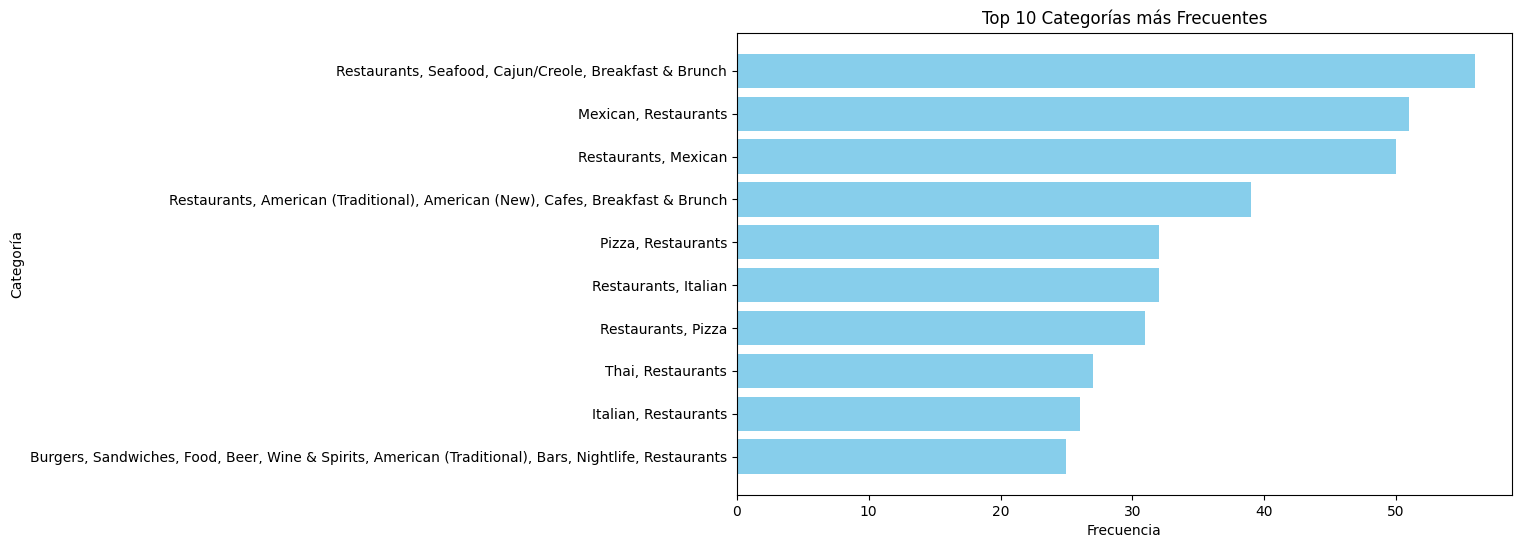

In [17]:

plt.figure(figsize=(10, 6))
plt.barh(df_top_categories['Category'], df_top_categories['Count'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Top 10 Categorías más Frecuentes')
plt.gca().invert_yaxis()
plt.show()

 Visualización alternativa: Nube de palabras

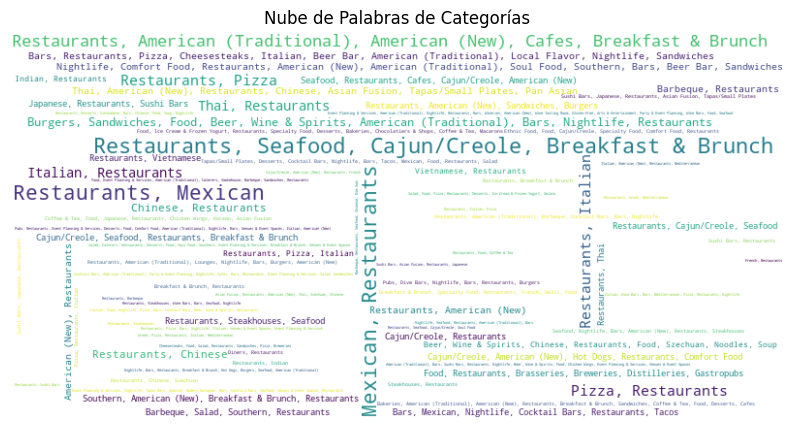

In [18]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Categorías')
plt.show()

### Análisis de Variables Categóricas

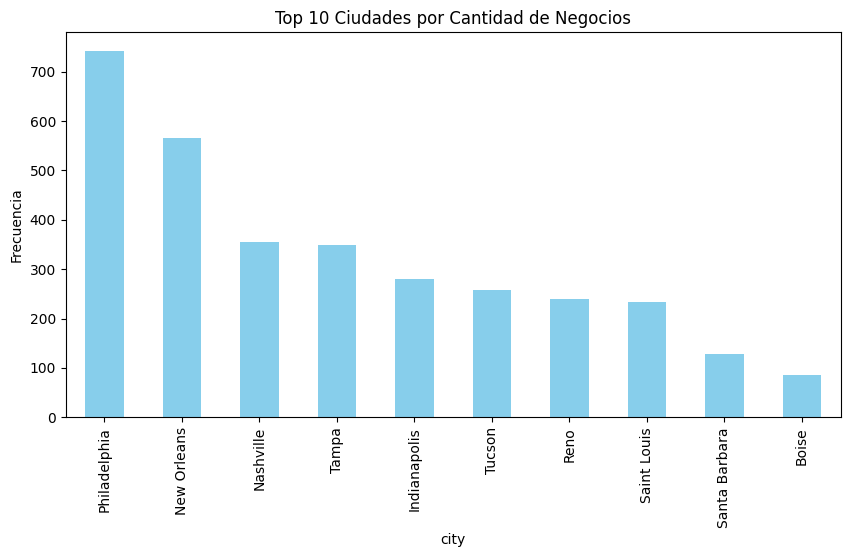

In [19]:
# Conteo de frecuencias para las ciudades
top_cities = df_yelp['city'].value_counts().head(10)
top_cities.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Top 10 Ciudades por Cantidad de Negocios")
plt.ylabel("Frecuencia")
plt.show()

### Analsis de sentimiento positivas y negativas

In [20]:
from textblob import TextBlob

# Función para determinar si el sentimiento es positivo o negativo
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # La polaridad va de -1 (negativo) a 1 (positivo)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Aplicar el análisis de sentimiento en la columna 'text' y crear la nueva columna 'sentiment'
df_yelp['sentiment'] = df_yelp['text'].apply(analyze_sentiment)

# Mostrar los primeros resultados para verificar
print(df_yelp[['text', 'sentiment']].head())

                                                text  sentiment
0  Good was on par with your typical sports bar. ...          1
1  With chain restaurants, I write short reviews ...          1
2  Been wanting to come to twin peaks for a while...          1
3  This place is pretty well-run - it's always cl...          1
4  We ordered take-out from this new place, and s...          1


### Relación entre estrellas y número de reviews

In [22]:
df_yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'text', 'cool', 'stars_y', 'date',
       'funny', 'review_id', 'useful', 'user_id', 'sentiment'],
      dtype='object')

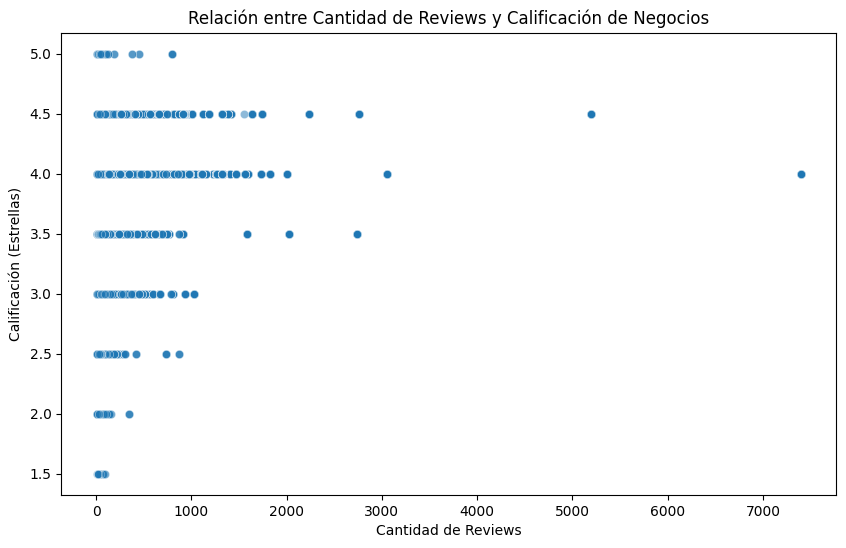

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars_x', data=df_yelp, alpha=0.5)
plt.title("Relación entre Cantidad de Reviews y Calificación de Negocios")
plt.xlabel("Cantidad de Reviews")
plt.ylabel("Calificación (Estrellas)")
plt.show()


### Gráfico de torta para todas las calificaciones de estrellas

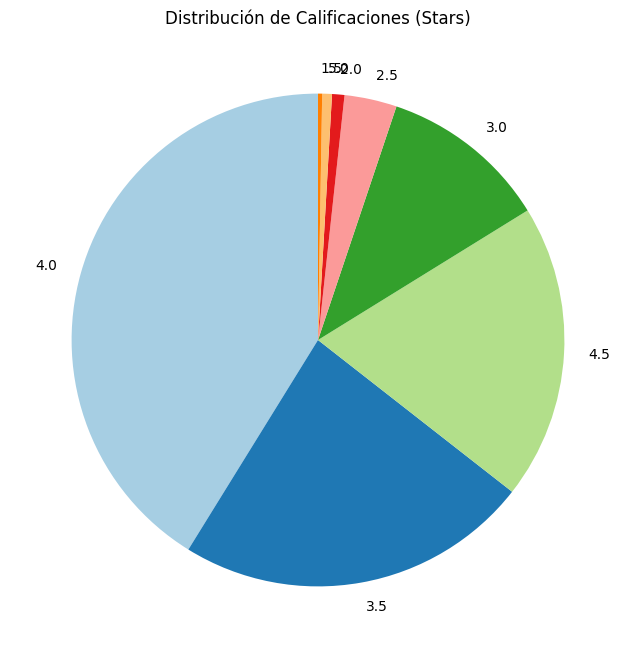

In [26]:
# Conteo de todas las calificaciones de estrellas
stars_counts = df_yelp['stars_x'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stars_counts, labels=stars_counts.index, startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de Calificaciones (Stars)")
plt.show()